In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import folium

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [ ]:
# Leer el archivo CSV
data = pd.read_csv('/content/Pump_initial_data.csv')

In [ ]:
#Opcion de carga local
# pumps_df=pd.read_csv("./data/Pump_initial_data.csv", parse_dates=['date_recorded'], date_format='%d/%m/%Y')

In [ ]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

## 1. Status Group vs Permit

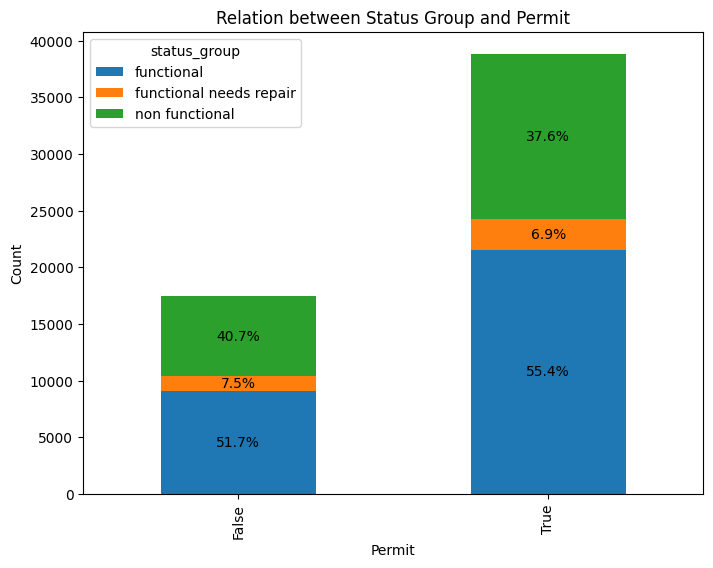

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab = pd.crosstab(data['permit'], data['status_group'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
totals = cross_tab.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab.columns:
        height = cross_tab.iloc[i][status]
        percentage = f'{height / total:.1%}'
        plt.text(i, bottom + height / 2, percentage, ha='center', va='center')
        bottom += height

plt.title('Relation between Status Group and Permit')
plt.xlabel('Permit')
plt.ylabel('Count')
plt.show()

Cuando Permit == False, se ve que un porcentaje de los puntos de agua sin permiso son no funcionales (40.7%), lo que indica una posible relación entre la falta de permisos y el deterioro de las infraestructuras de agua. Aunque no haya tanta diferencia, los permisos podrían mejorar la longevidad y la funcionalidad de los puntos de agua.

## 2. Status Group vs Scheme Management

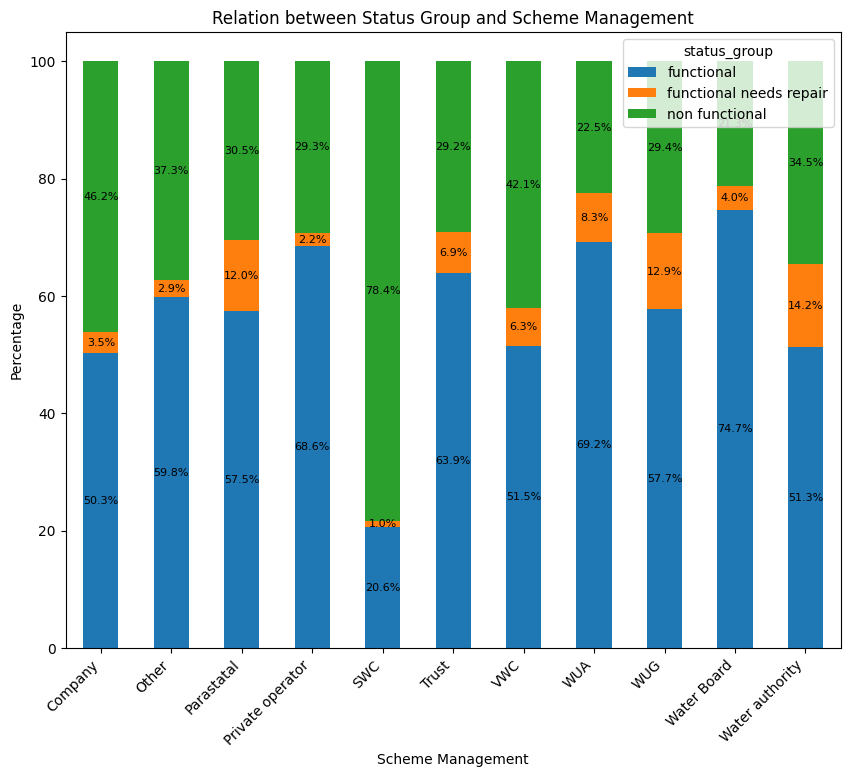

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab_scheme = pd.crosstab(data['scheme_management'], data['status_group'])

cross_tab_scheme_percentage = cross_tab_scheme.div(cross_tab_scheme.sum(1), axis=0) * 100

ax = cross_tab_scheme_percentage.plot(kind='bar', stacked=True, figsize=(10, 8))

totals = cross_tab_scheme.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_scheme.columns:
        height = cross_tab_scheme_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Scheme Management')
plt.xlabel('Scheme Management')
plt.ylabel('Percentage')
plt.show()



*   Water User Associations (WUA) y Water Boards tienen la mayor proporción de puntos funcionales (69.2% y 74.7% respectivamente), lo que indica una gestión más efectiva
*   Private operators y Trust también tienen buenas tasas de funcionalidad (68.6% y 63.9%).
* Parastatal y Other gestionan puntos con una mayor proporción de fallos, con un alto porcentaje de puntos no funcionales (30.5% y 37.3%).


Un parastatal es una empresa o entidad parcialmente controlada por el gobierno, pero que opera de manera independiente. Estas organizaciones a menudo brindan servicios públicos o esenciales, como energía, agua, o transporte, y aunque pueden estar vinculadas al gobierno, suelen operar con una estructura corporativa.



## 3. Status Group vs Construction Year

<ipython-input-7-aa3f1a2272e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['decade'] = (filtered_data['construction_year'] // 10) * 10


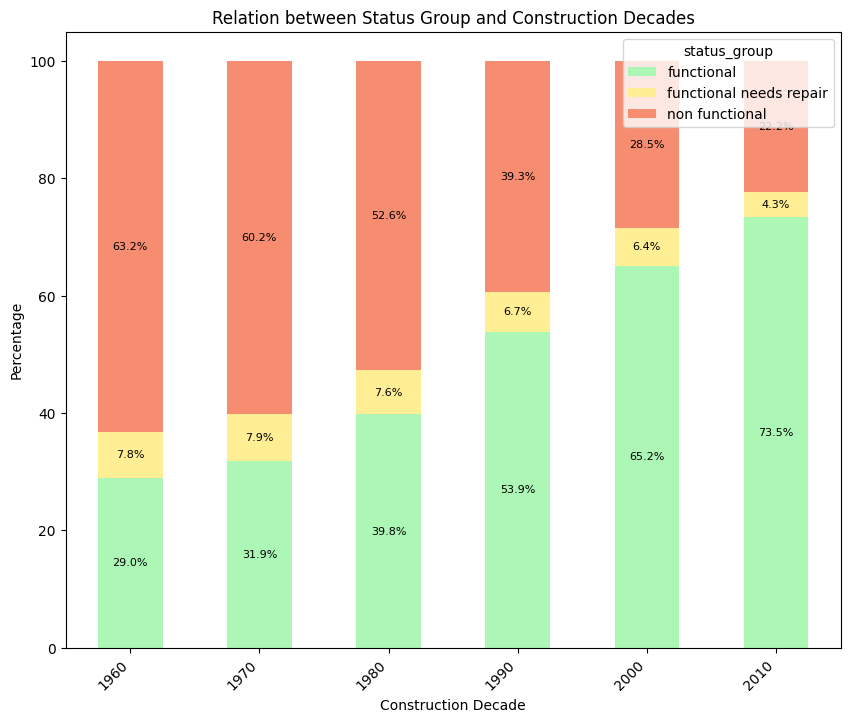

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtros y creación de la tabla cruzada
filtered_data = data[(data['construction_year'] != 0) & (data['construction_year'] >= 1960) & (data['construction_year'] <= 2013)]
filtered_data['decade'] = (filtered_data['construction_year'] // 10) * 10

cross_tab_decade = pd.crosstab(filtered_data['decade'], filtered_data['status_group'])
cross_tab_decade_percentage = cross_tab_decade.div(cross_tab_decade.sum(1), axis=0) * 100

# Colores personalizados
custom_colors = {
    "functional": "#adf7b6",   # Verde pastel
    "functional needs repair": "#ffee93", # Amarillo pastel
    "non functional": "#f68c70"  # Rojo pastel
}

# Crear el gráfico apilado con colores personalizados
ax = cross_tab_decade_percentage.plot(kind='bar', stacked=True, figsize=(10, 8),
                                      color=[custom_colors['functional'], custom_colors['functional needs repair'], custom_colors['non functional']])

# Añadir porcentajes en las barras
totals = cross_tab_decade.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_decade.columns:
        height = cross_tab_decade_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

# Personalizar la apariencia del gráfico
plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Construction Decades')
plt.xlabel('Construction Decade')
plt.ylabel('Percentage')
plt.show()

Las infraestructuras más recientes (décadas de 2000 y 2010) muestran una mayor funcionalidad, con más del 65% de puntos de agua en buen estado, mientras que las construcciones de las décadas de 1960 y 1970 tienen una proporción considerable de puntos no funcionales, superior al 60%.

Esto sugiere una mejora en la gestión y mantenimiento de las bombas construidas en los últimos años.


## 4. Status Group vs Extraction Type Class

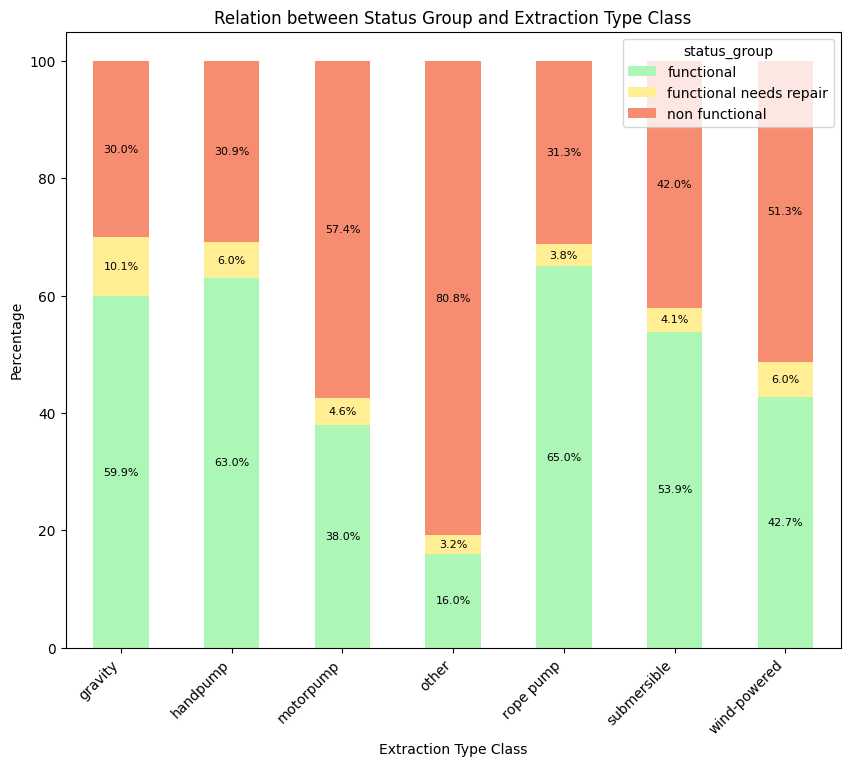

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear la tabla cruzada
cross_tab_extraction = pd.crosstab(data['extraction_type_class'], data['status_group'])
cross_tab_extraction_percentage = cross_tab_extraction.div(cross_tab_extraction.sum(1), axis=0) * 100

# Colores personalizados
custom_colors = {
    "functional": "#adf7b6",   # Verde pastel
    "functional needs repair": "#ffee93", # Amarillo pastel
    "non functional": "#f68c70"  # Rojo pastel
}

# Crear el gráfico apilado con colores personalizados
ax = cross_tab_extraction_percentage.plot(kind='bar', stacked=True, figsize=(10, 8),
                                          color=[custom_colors['functional'], custom_colors['functional needs repair'], custom_colors['non functional']])

# Añadir porcentajes en las barras
totals = cross_tab_extraction.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_extraction.columns:
        height = cross_tab_extraction_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

# Personalizar la apariencia del gráfico
plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Extraction Type Class')
plt.xlabel('Extraction Type Class')
plt.ylabel('Percentage')
plt.show()

1. Gravity: Utiliza la gravedad para mover el agua desde una fuente más alta sin necesidad de bombeo.
2. Handpump: Bombas manuales que requieren esfuerzo humano para extraer el agua.
3. Motorpump: Bombas impulsadas por un motor, generalmente a combustible o electricidad.
4. Rope pump: Sistema de polea simple con una cuerda y pistones para extraer agua.
5. Submersible: Bombas sumergidas bajo el agua, eficientes para pozos profundos.
6. Wind-powered: Utiliza energía eólica para extraer agua, especialmente en áreas rurales.

**Resumen:**

* Gravity y handpumps son sistemas confiables, con más del 59% de funcionalidad, debido a su simplicidad y bajo mantenimiento.
* Motorpump y wind-powered tienen las tasas más altas de fallos, lo que sugiere que requieren más mantenimiento o presentan desafíos técnicos.
* Rope pumps y submersible pumps tienen tasas de funcionalidad elevadas, lo que indica que son opciones más efectivas para pozos profundos o áreas con suministro de agua complicado.

La complejidad tecnológica parece correlacionarse con mayores tasas de fallos.


## 5. Status Group vs Management Group

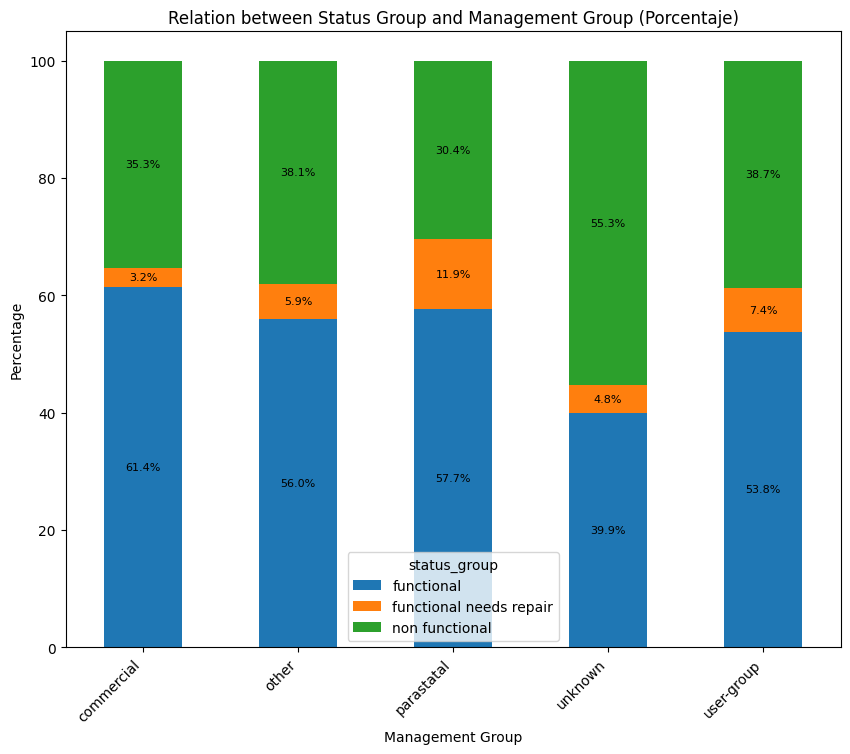

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab_management = pd.crosstab(data['management_group'], data['status_group'])

cross_tab_management_percentage = cross_tab_management.div(cross_tab_management.sum(1), axis=0) * 100

ax = cross_tab_management_percentage.plot(kind='bar', stacked=True, figsize=(10, 8))

totals = cross_tab_management.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_management.columns:
        height = cross_tab_management_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Management Group (Porcentaje)')
plt.xlabel('Management Group')
plt.ylabel('Percentage')
plt.show()

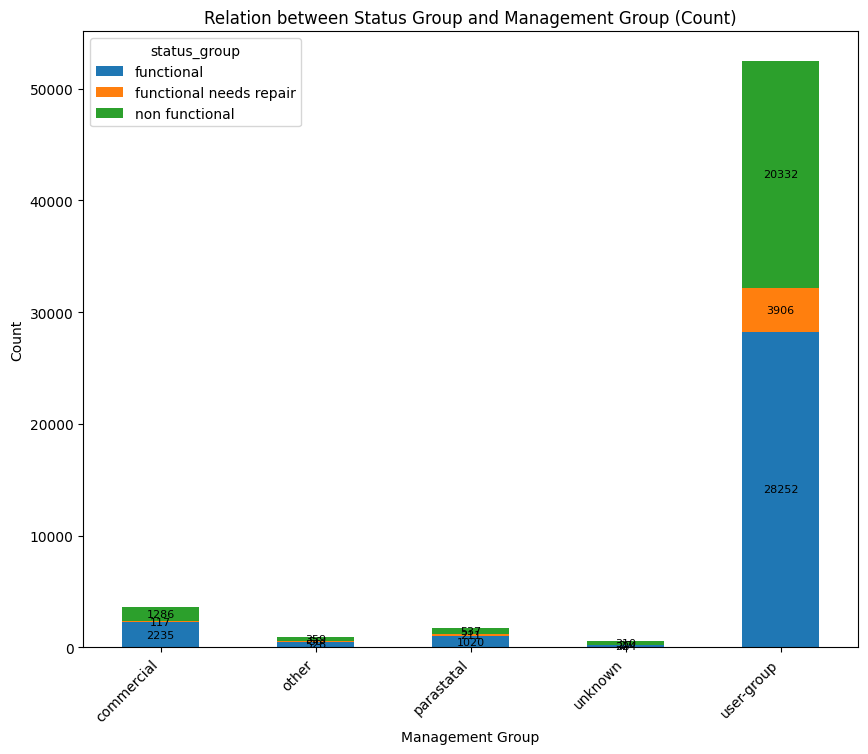

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una tabla de contingencia con los conteos
cross_tab_management = pd.crosstab(data['management_group'], data['status_group'])

# Graficar las barras apiladas con los conteos
ax = cross_tab_management.plot(kind='bar', stacked=True, figsize=(10, 8))

# Añadir los totales dentro de las barras
for i, total in enumerate(cross_tab_management.sum(axis=1)):
    bottom = 0
    for status in cross_tab_management.columns:
        height = cross_tab_management.iloc[i][status]
        if height > 0:
            percentage = f'{height}'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Management Group (Count)')
plt.xlabel('Management Group')
plt.ylabel('Count')
plt.show()

Al revisar en (%) se que que los puntos de agua gestionados por grupos comerciales y parastatales son los más funcionales, mientras que los gestionados por grupos de usuarios y desconocidos tienen más problemas de funcionalidad.

Pero al revisar por count se ve que esto se puede dat por el total de registros por cada management group

Que son grupos comerciales?

## 6. Payment Type vs Scheme Management

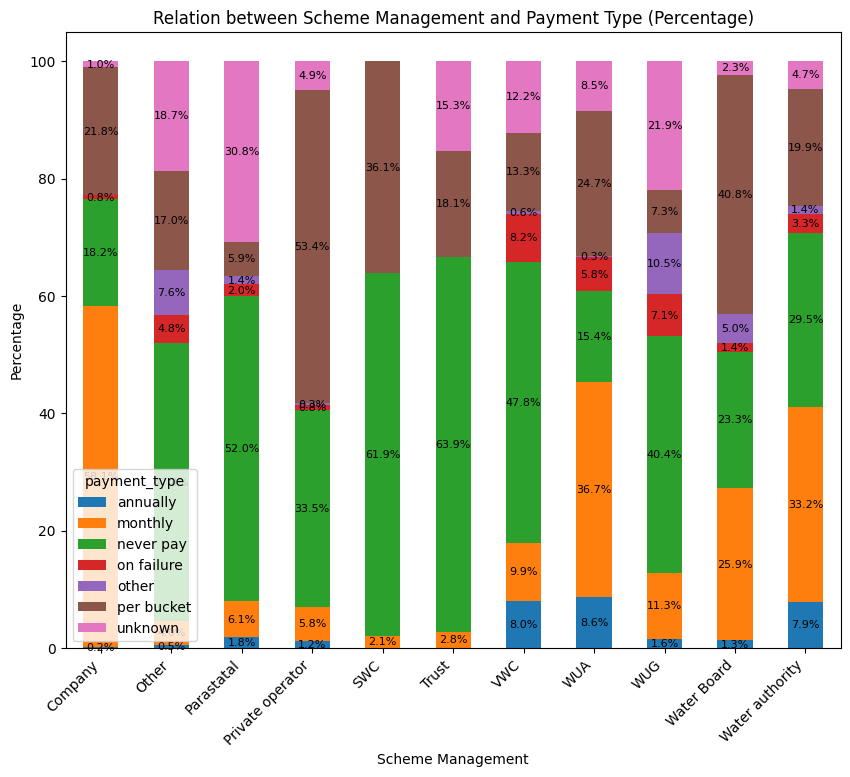

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab_scheme_payment = pd.crosstab(data['scheme_management'], data['payment_type'])

cross_tab_scheme_payment_percentage = cross_tab_scheme_payment.div(cross_tab_scheme_payment.sum(1), axis=0) * 100

ax = cross_tab_scheme_payment_percentage.plot(kind='bar', stacked=True, figsize=(10, 8))

totals = cross_tab_scheme_payment.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for payment in cross_tab_scheme_payment.columns:
        height = cross_tab_scheme_payment_percentage.iloc[i][payment]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Scheme Management and Payment Type (Percentage)')
plt.xlabel('Scheme Management')
plt.ylabel('Percentage')
plt.show()



*   SWC: Sanitation and Water Committee
*   VWC: Village Water Committee
*   WUG: Water User Group
*   WUA: Water User Association



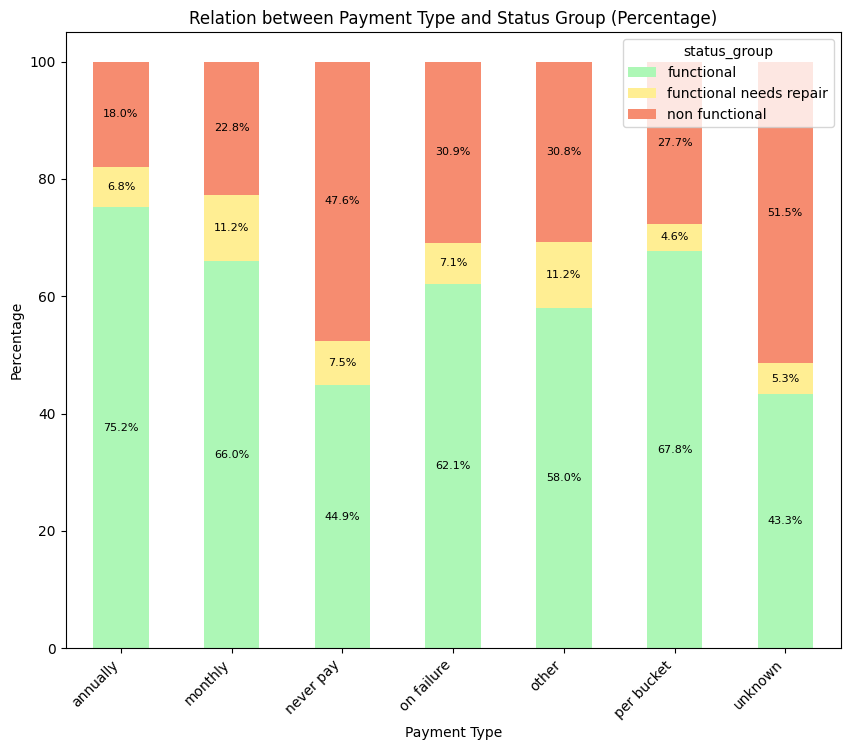

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab_payment_status = pd.crosstab(data['payment_type'], data['status_group'])
cross_tab_payment_status_percentage = cross_tab_payment_status.div(cross_tab_payment_status.sum(1), axis=0) * 100

custom_colors = {
    "functional": "#adf7b6",
    "functional needs repair": "#ffee93",
    "non functional": "#f68c70"
}

ax = cross_tab_payment_status_percentage.plot(kind='bar', stacked=True, figsize=(10, 8),
                                              color=[custom_colors['functional'], custom_colors['functional needs repair'], custom_colors['non functional']])

totals = cross_tab_payment_status.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_payment_status.columns:
        height = cross_tab_payment_status_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Payment Type and Status Group (Percentage)')
plt.xlabel('Payment Type')
plt.ylabel('Percentage')
plt.show()

Con los metodos de pago annually y per bucket se tienen las mayores proporciones de puntos de agua funcionales (75.2% y 67.8%, respectivamente).

Por otro lado, los puntos de agua con never pay y unknown tienen los mayores porcentajes de fallos (47.6% y 51.5%, respectivamente).

Los sistemas donde se realiza un pago regular están mejor mantenidos, mientras que los puntos de agua sin estructura de pago tienden a ser menos funcionales.

## Other Validations

In [ ]:
data['source'].value_counts()

,count
source,
spring,17021
shallow well,16824
machine dbh,11075
river,9612
rainwater harvesting,2295
hand dtw,874
lake,765
dam,656
other,212


In [ ]:
data['waterpoint_type'].value_counts()

,count
waterpoint_type,
communal standpipe,28522
hand pump,17488
other,6380
communal standpipe multiple,6103
improved spring,784
cattle trough,116
dam,7


In [ ]:
data.shape

(59400, 41)

In [ ]:
data.dtypes

,0
id,int64
amount_tsh,float64
date_recorded,object
funder,object
gps_height,int64
installer,object
longitude,float64
latitude,float64
wpt_name,object
num_private,int64


In [ ]:
scheme_status_count = data.groupby(['scheme_management', 'status_group']).size().reset_index(name='count')
total_by_scheme = data.groupby('scheme_management').size().reset_index(name='total_count')
scheme_status_count = scheme_status_count.merge(total_by_scheme, on='scheme_management')
scheme_status_count['percentage'] = (scheme_status_count['count'] / scheme_status_count['total_count']) * 100

print(scheme_status_count)

   scheme_management             status_group  count  total_count  percentage
0            Company               functional    534         1061   50.329877
1            Company  functional needs repair     37         1061    3.487276
2            Company           non functional    490         1061   46.182846
3              Other               functional    458          766   59.791123
4              Other  functional needs repair     22          766    2.872063
5              Other           non functional    286          766   37.336815
6         Parastatal               functional    966         1680   57.500000
7         Parastatal  functional needs repair    202         1680   12.023810
8         Parastatal           non functional    512         1680   30.476190
9   Private operator               functional    729         1063   68.579492
10  Private operator  functional needs repair     23         1063    2.163688
11  Private operator           non functional    311         106

In [ ]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

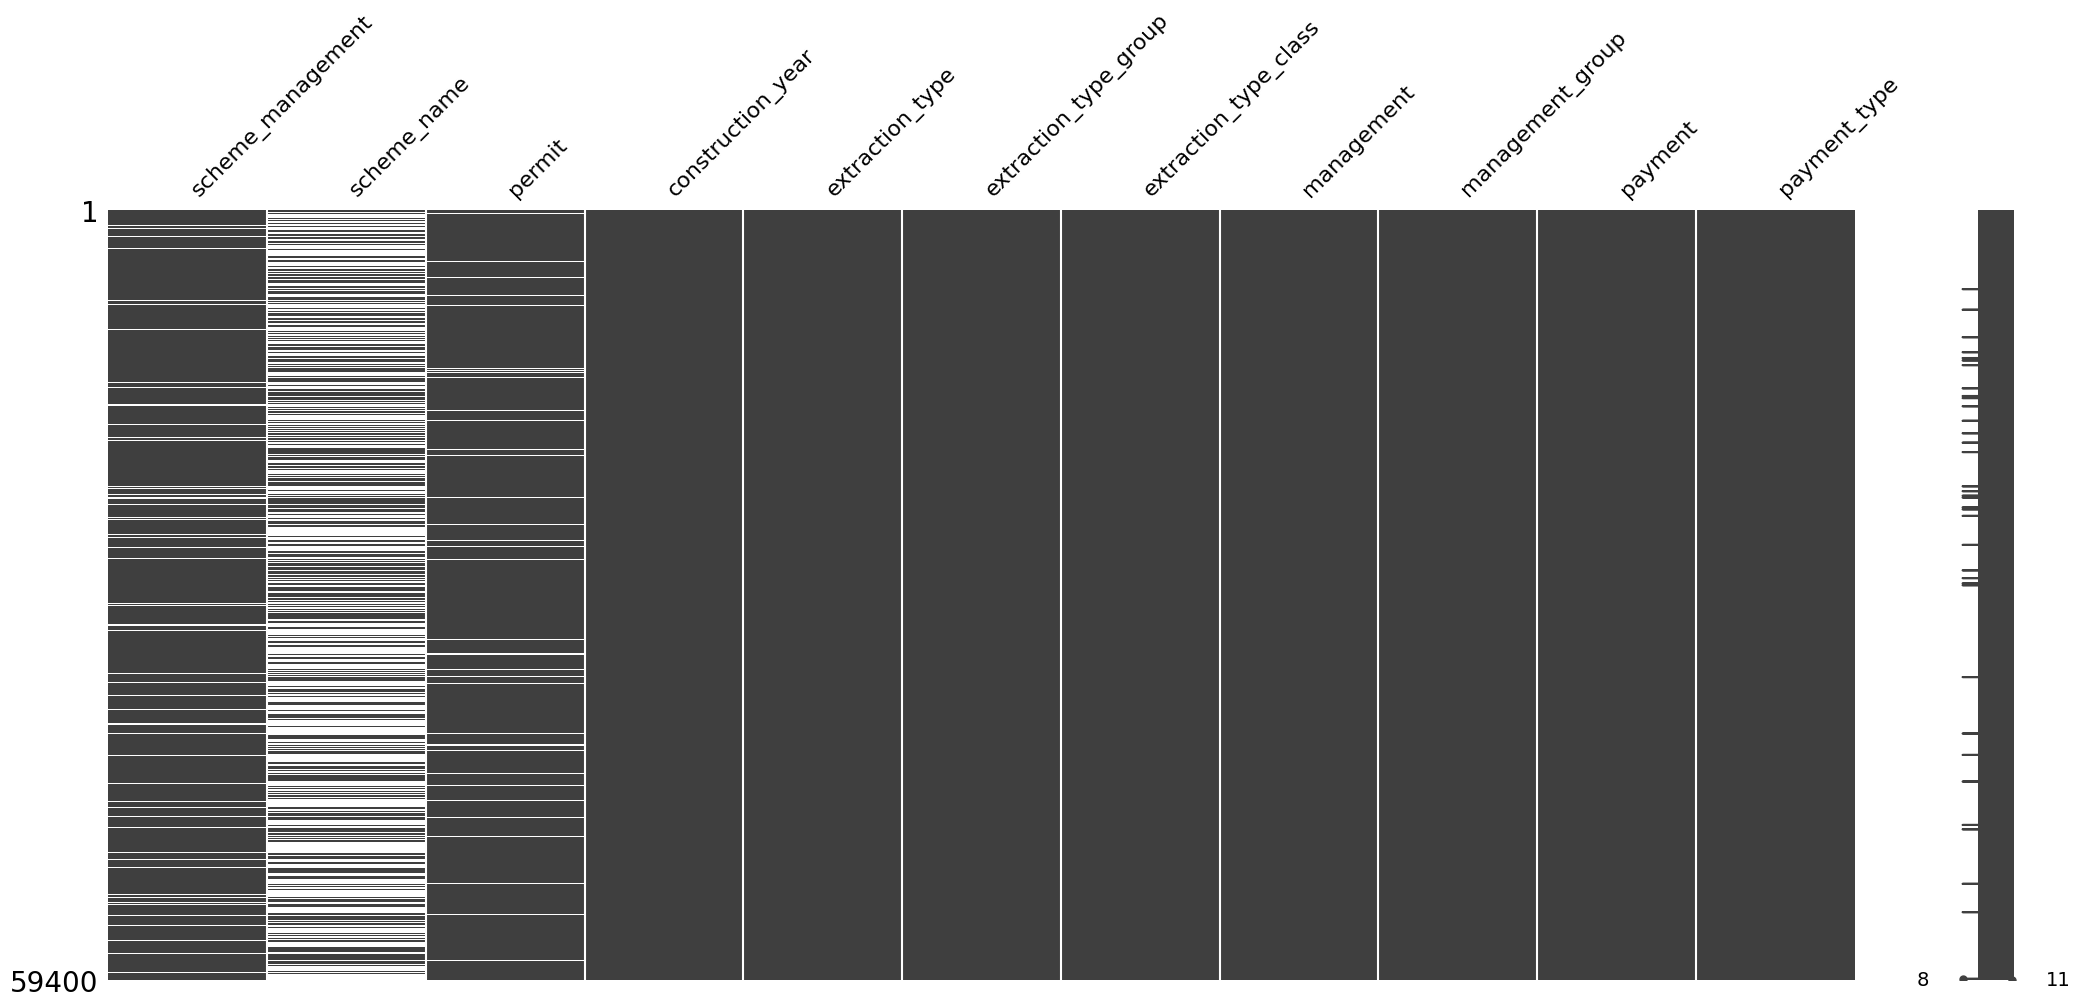

In [ ]:
import missingno as msno

columns_rev = ['scheme_management', 'scheme_name', 'permit',
                       'construction_year', 'extraction_type',
                       'extraction_type_group', 'extraction_type_class',
                       'management', 'management_group', 'payment', 'payment_type']

filtered_data = data[columns_rev]

msno.matrix(filtered_data)
plt.show()

In [ ]:
nulls_por_columna = filtered_data.isnull().sum()
porcentaje_nulos_por_columna = (filtered_data.isnull().mean()) * 100

nulos_y_porcentaje = pd.DataFrame({
    'Número de Nulos': nulls_por_columna,
    'Porcentaje de Nulos (%)': porcentaje_nulos_por_columna
})

nulos_y_porcentaje

,Número de Nulos,Porcentaje de Nulos (%)
scheme_management,3878,6.528620
scheme_name,28810,48.501684
permit,3056,5.144781
construction_year,0,0.000000
extraction_type,0,0.000000
extraction_type_group,0,0.000000
extraction_type_class,0,0.000000
management,0,0.000000
management_group,0,0.000000
payment,0,0.000000


In [ ]:
filtered_data.head(10)

,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type
0,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually
1,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay
2,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket
3,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay
4,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay
5,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket
6,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay
7,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown
8,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay
9,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay


In [ ]:
filtered_data['permit'].value_counts(normalize=True, dropna=False)

,proportion
permit,
True,0.654074
False,0.294478
NaN,0.051448


In [ ]:
filtered_data['construction_year'].value_counts().sort_index()

,count
construction_year,
0,20709
1960,102
1961,21
1962,30
1963,85
1964,40
1965,19
1966,17
1967,88


In [ ]:
construction_year_zero_count = (filtered_data['construction_year'] == 0).sum()

total_records = len(filtered_data)
construction_year_zero_percentage = (construction_year_zero_count / total_records) * 100

print(f"Registros con construction_year = 0: {construction_year_zero_count}")
print(f"Porcentaje de registros con construction_year = 0: {construction_year_zero_percentage:.2f}%")

Registros con construction_year = 0: 20709
Porcentaje de registros con construction_year = 0: 34.86%


In [ ]:
filtered_data['scheme_management'].isnull().sum()

3878

In [ ]:
# VWC village water committee
# WUGs Water User Groups
filtered_data['management_group'].value_counts()

,count
management_group,
user-group,52490
commercial,3638
parastatal,1768
other,943
unknown,561


In [ ]:
# VWC village water committee
# WUGs Water User Groups
filtered_data['scheme_management'].value_counts()

,count
scheme_management,
VWC,36793
WUG,5206
Water authority,3153
WUA,2883
Water Board,2748
Parastatal,1680
Private operator,1063
Company,1061
Other,766


In [ ]:
filtered_data['management'].value_counts()

,count
management,
vwc,40507
wug,6515
water board,2933
wua,2535
private operator,1971
parastatal,1768
water authority,904
other,844
company,685


In [ ]:
filtered_data.columns

Index(['scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type'],
      dtype='object')

In [ ]:
filtered_data['extraction_type'].value_counts()

,count
extraction_type,
gravity,26780
nira/tanira,8154
other,6430
submersible,4764
swn 80,3670
mono,2865
india mark ii,2400
afridev,1770
ksb,1415


In [ ]:
filtered_data['extraction_type_group'].value_counts()

,count
extraction_type_group,
gravity,26780
nira/tanira,8154
other,6430
submersible,6179
swn 80,3670
mono,2865
india mark ii,2400
afridev,1770
rope pump,451


In [ ]:
filtered_data['extraction_type_class'].value_counts()

,count
extraction_type_class,
gravity,26780
handpump,16456
other,6430
submersible,6179
motorpump,2987
rope pump,451
wind-powered,117


In [ ]:
filtered_data['payment'].value_counts()

,count
payment,
never pay,25348
pay per bucket,8985
pay monthly,8300
unknown,8157
pay when scheme fails,3914
pay annually,3642
other,1054


In [ ]:
filtered_data['payment_type'].value_counts()

,count
payment_type,
never pay,25348
per bucket,8985
monthly,8300
unknown,8157
on failure,3914
annually,3642
other,1054
